In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def rgb2gray(img):
    gray = 0.2126*img[...,2]+0.7152*img[...,1]+0.0722*img[...,0]
    return gray

# 二次元離散フーリエ変換

In [3]:
def fft2d(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    return fshift,magnitude_spectrum

def ifft2d(fshift):
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back

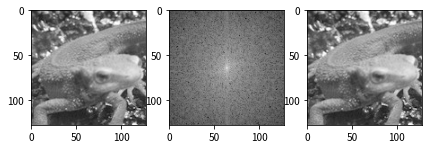

In [6]:
img = cv2.imread("./img/imori.jpg")
gray_img = rgb2gray(img)

fshift,out1 = fft2d(gray_img)
out2 = ifft2d(fshift)

plt.figure(facecolor="white",figsize=(7,3))
plt.subplot(1,3,1)
plt.imshow(gray_img,cmap="gray")
plt.subplot(1,3,2)
plt.imshow(out1,cmap="gray")
plt.subplot(1,3,3)
plt.imshow(out2,cmap="gray")

# ローパスフィルタ

In [11]:
def lowpass_filter(img,r):
    size = img.shape
    mask = np.zeros(size)
    length = size[0]
    centery = size[0]/2
    for x in range(0,length):
        for y in range(0,length):
            if (x- centery)**2 +(y- centery)**2 <r**2:
                mask[x,y]=1
    return mask

def lowpass_filtering(img,r):
    fshift,magnitude_spectrum = fft2d(img)
    mask = lowpass_filter(img,r)
    masked_fshift = fshift*mask
    masked_magnitude_spectrum = 20*np.log(np.abs(masked_fshift))
    img_back = ifft2d(masked_fshift)
    return img_back,masked_magnitude_spectrum

<ipython-input-11-114d6f11d817>:16: RuntimeWarning: divide by zero encountered in log
  masked_magnitude_spectrum = 20*np.log(np.abs(masked_fshift))


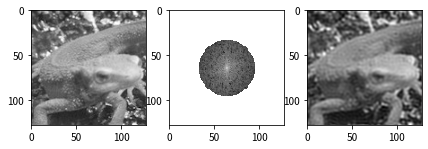

In [12]:
img = cv2.imread("./img/imori.jpg")
gray_img = rgb2gray(img)

out,masked_magnitude_spectrum = lowpass_filtering(gray_img,32)

plt.figure(facecolor="white",figsize=(7,3))
plt.subplot(1,3,1)
plt.imshow(gray_img,cmap="gray")
plt.subplot(1,3,2)
plt.imshow(masked_magnitude_spectrum,cmap="gray")
plt.subplot(1,3,3)
plt.imshow(out,cmap="gray")

# ハイパスフィルタ

In [13]:
def highpass_filter(img,r):
    size = img.shape
    mask = np.zeros(size)
    length = size[0]
    centery = size[0]/2
    for x in range(0,length):
        for y in range(0,length):
            if (x- centery)**2 +(y- centery)**2 >r**2:
                mask[x,y]=1
    return mask

def highpass_filtering(img,r):
    fshift,magnitude_spectrum = fft2d(img)
    mask = highpass_filter(img,r)
    masked_fshift = fshift*mask
    masked_magnitude_spectrum = 20*np.log(np.abs(masked_fshift))
    img_back = ifft2d(masked_fshift)
    return img_back,masked_magnitude_spectrum    

<ipython-input-13-002f274a0c4f>:16: RuntimeWarning: divide by zero encountered in log
  masked_magnitude_spectrum = 20*np.log(np.abs(masked_fshift))


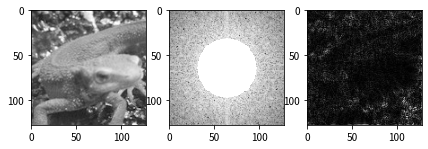

In [14]:
img = cv2.imread("./img/imori.jpg")
gray_img = rgb2gray(img)

out,masked_magnitude_spectrum = highpass_filtering(gray_img,32)

plt.figure(facecolor="white",figsize=(7,3))
plt.subplot(1,3,1)
plt.imshow(gray_img,cmap="gray")
plt.subplot(1,3,2)
plt.imshow(masked_magnitude_spectrum,cmap="gray")
plt.subplot(1,3,3)
plt.imshow(out,cmap="gray")